<a href="https://colab.research.google.com/github/Shamiul-693/-User-Behavior-Analysis-for-Optimizing-Engagement-on-Social-Media-Platforms-/blob/main/User_Behavior_Analysis_for_Optimizing_Engagement_on_Social_Media_Platforms_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:

import pandas as pd
import numpy as np
from  sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import OneHotEncoder
from datetime import datetime
# Visualize correlation heatmap
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('/content/drive/MyDrive/ User Behavior Analysis for Optimizing Engagement on Social Media  Platforms /SocialMediaUsersDataset.csv')

In [3]:
data.head()

,UserID,Name,Gender,DOB,Interests,City,Country
0,1,Jesse Lawhorn,Female,1958-10-15,"'Movies', 'Fashion', 'Fashion', 'Books'",Sibolga,Indonesia
1,2,Stacy Payne,Female,2004-07-21,"'Gaming', 'Finance and investments', 'Outdoor ...",Al Abyār,Libya
2,3,Katrina Nicewander,Female,2000-02-07,"'DIY and crafts', 'Music', 'Science', 'Fashion'",Wādī as Sīr,Jordan
3,4,Eric Yarbrough,Male,1985-04-14,"'Outdoor activities', 'Cars and automobiles'",Matera,Italy
4,5,Daniel Adkins,Female,1955-09-18,"'Politics', 'History'",Biruaca,Venezuela


In [4]:
data.describe()

,UserID
count,100000.000000
mean,50000.500000
std,28867.657797
min,1.000000
25%,25000.750000
50%,50000.500000
75%,75000.250000
max,100000.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   UserID     100000 non-null  int64 
 1   Name       100000 non-null  object
 2   Gender     100000 non-null  object
 3   DOB        100000 non-null  object
 4   Interests  100000 non-null  object
 5   City       100000 non-null  object
 6   Country    100000 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [6]:
print(data.columns)

Index(['UserID', 'Name', 'Gender', 'DOB', 'Interests', 'City', 'Country'], dtype='object')


In [7]:
print(data.isnull().sum())

UserID       0
Name         0
Gender       0
DOB          0
Interests    0
City         0
Country      0
dtype: int64


In [8]:
print(data[[ 'Name', 'Gender', 'DOB', 'Interests', 'City', 'Country']].describe())

              Name  Gender         DOB  Interests         City        Country
count       100000  100000      100000     100000       100000         100000
unique       92580       2       18536      53737        24452            244
top     John Smith    Male  2002-11-22  'Fashion'  Springfield  United States
freq            21   50069          17       1371           37          12311


In [13]:
data['Monthly_Activity'] = np.random.randint(5, 50, size=len(data))
data.loc[::10, 'Monthly_Activity'] = np.nan  # Introduce NaN values
data['Monthly_Activity'] = data['Monthly_Activity'].fillna(data['Monthly_Activity'].mean())
data['City'] = data['City'].fillna(data['City'].mode()[0])
data = data.dropna(subset=['Name'])
data['DOB'] = pd.to_datetime(data['DOB'], errors='coerce')
data['Age'] = datetime.now().year - data['DOB'].dt.year
data['Monthly_Activity'] = data.groupby('Age')['Monthly_Activity'].transform(lambda x: x.fillna(x.mean()))

# Step 3: Verify Cleaned Data
print("\nAfter Handling Missing Data:")
print(data.isnull().sum())
print(data.head())



After Handling Missing Data:
UserID              0
Name                0
Gender              0
DOB                 0
Interests           0
City                0
Country             0
Monthly_Activity    0
Age                 0
dtype: int64
   UserID                Name  Gender        DOB  \
0       1       Jesse Lawhorn  Female 1958-10-15   
1       2         Stacy Payne  Female 2004-07-21   
2       3  Katrina Nicewander  Female 2000-02-07   
3       4      Eric Yarbrough    Male 1985-04-14   
4       5       Daniel Adkins  Female 1955-09-18   

                                           Interests         City    Country  \
0            'Movies', 'Fashion', 'Fashion', 'Books'      Sibolga  Indonesia   
1  'Gaming', 'Finance and investments', 'Outdoor ...     Al Abyār      Libya   
2    'DIY and crafts', 'Music', 'Science', 'Fashion'  Wādī as Sīr     Jordan   
3       'Outdoor activities', 'Cars and automobiles'       Matera      Italy   
4                              'Politics', 'Hi

# Visualizing User Activity Trends

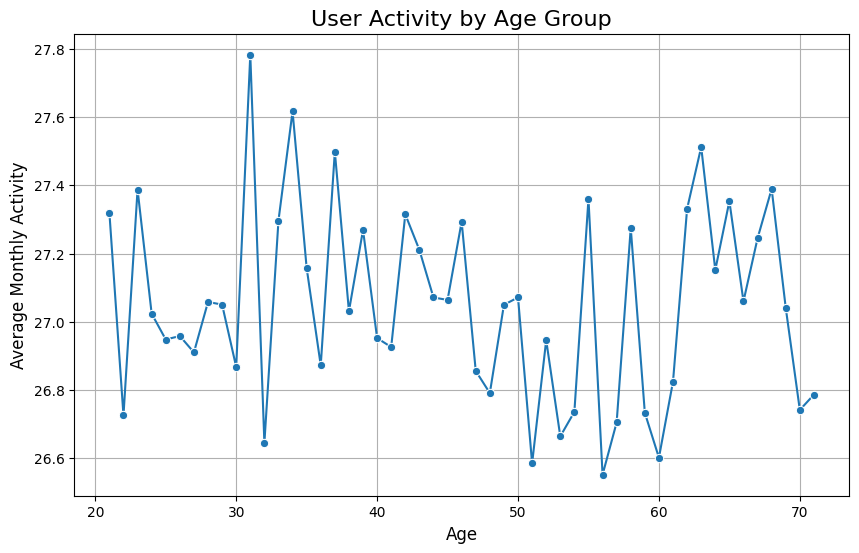

<ipython-input-14-0d9920786792>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=activity_by_gender, x='Gender', y='Monthly_Activity', palette='coolwarm')


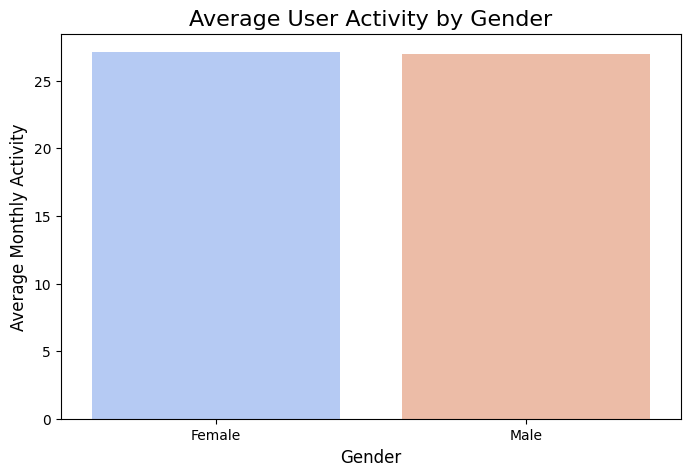

<ipython-input-14-0d9920786792>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_cities, x='City', y='Monthly_Activity', palette='viridis')


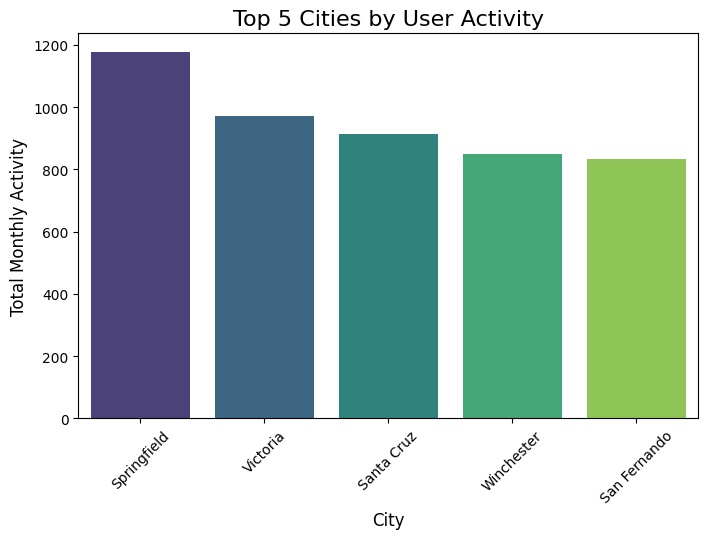

In [14]:
# Preprocessing: Calculate Age from DOB
data['DOB'] = pd.to_datetime(data['DOB'], errors='coerce')
current_year = datetime.now().year
data['Age'] = current_year - data['DOB'].dt.year

# Sample Data: Simulate User Activity Over Time (For Demo)

np.random.seed(42)
data['Monthly_Activity'] = np.random.randint(5, 50, size=len(data))  # Simulate activity counts

# Line Chart: Trends in User Activity Over Age
activity_by_age = data.groupby('Age')['Monthly_Activity'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=activity_by_age, x='Age', y='Monthly_Activity', marker='o')
plt.title('User Activity by Age Group', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Average Monthly Activity', fontsize=12)
plt.grid(True)
plt.show()

# Bar Graph: Average Activity by Gender
activity_by_gender = data.groupby('Gender')['Monthly_Activity'].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(data=activity_by_gender, x='Gender', y='Monthly_Activity', palette='coolwarm')
plt.title('Average User Activity by Gender', fontsize=16)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Average Monthly Activity', fontsize=12)
plt.show()

# Bar Graph: Top 5 Cities by User Activity
top_cities = data.groupby('City')['Monthly_Activity'].sum().sort_values(ascending=False).head(5).reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(data=top_cities, x='City', y='Monthly_Activity', palette='viridis')
plt.title('Top 5 Cities by User Activity', fontsize=16)
plt.xlabel('City', fontsize=12)
plt.ylabel('Total Monthly Activity', fontsize=12)
plt.xticks(rotation=45)
plt.show()


#Perform a statistical analysis of the collected data to identify patterns or outliers.

              UserID                         DOB  Monthly_Activity  \
count  100000.000000                      100000     100000.000000   
mean    50000.500000  1979-06-29 09:00:12.096000         27.051230   
min         1.000000         1954-01-01 00:00:00          5.000000   
25%     25000.750000         1966-08-20 00:00:00         16.000000   
50%     50000.500000         1979-07-06 00:00:00         27.000000   
75%     75000.250000         1992-04-26 00:00:00         38.000000   
max    100000.000000         2004-12-30 00:00:00         49.000000   
std     28867.657797                         NaN         12.970157   

                 Age  
count  100000.000000  
mean       46.008990  
min        21.000000  
25%        33.000000  
50%        46.000000  
75%        59.000000  
max        71.000000  
std        14.756297  


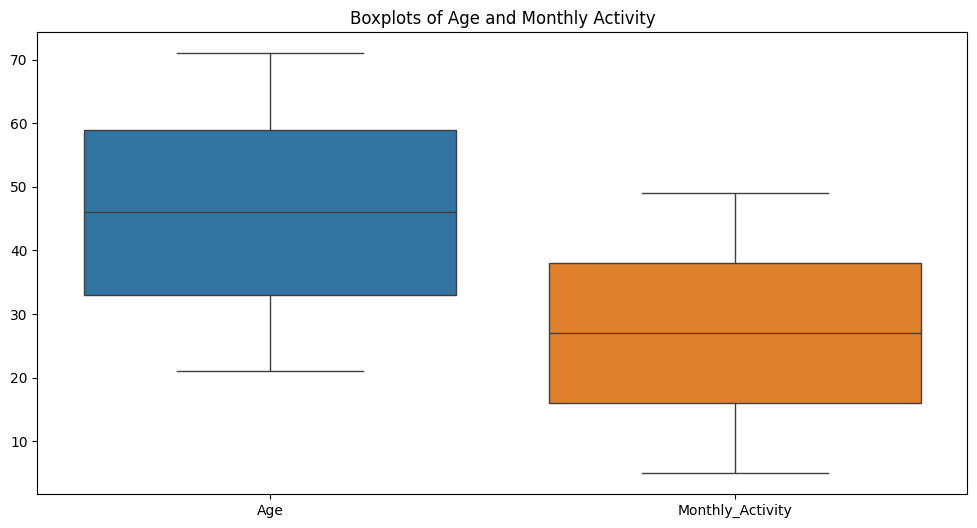


Outliers in Age: Series([], Name: Age, dtype: int32)

Outliers in Monthly Activity: Series([], Name: Monthly_Activity, dtype: int64)

Correlation Matrix:
                       Age  Monthly_Activity
Age               1.00000          -0.00256
Monthly_Activity -0.00256           1.00000


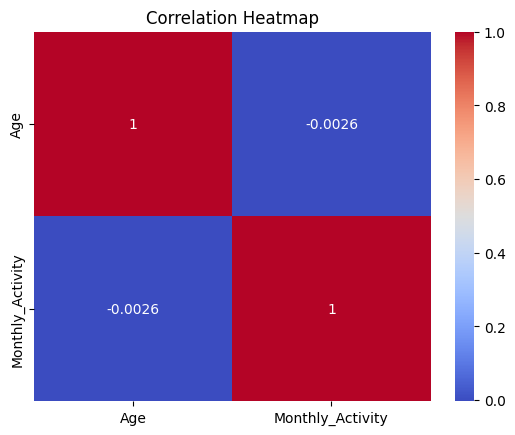

In [15]:
# prompt: Perform a statistical analysis of the collected data to identify patterns or outliers.

# Statistical analysis and outlier detection

# Summary statistics
print(data.describe())

# Outlier detection using boxplots
plt.figure(figsize=(12, 6))
sns.boxplot(data=data[['Age', 'Monthly_Activity']])
plt.title('Boxplots of Age and Monthly Activity')
plt.show()

# Identify outliers based on IQR
def find_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    outliers = data[((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR)))]
    return outliers

outliers_age = find_outliers_iqr(data['Age'])
outliers_activity = find_outliers_iqr(data['Monthly_Activity'])

print("\nOutliers in Age:", outliers_age)
print("\nOutliers in Monthly Activity:", outliers_activity)


# Correlation analysis
correlation_matrix = data[['Age', 'Monthly_Activity']].corr()
print("\nCorrelation Matrix:\n", correlation_matrix)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

#Further analysis can include:
# - Z-score based outlier detection
# - Histograms and density plots for distributions
# - Statistical tests (e.g., t-tests, ANOVA) for comparing groups

Summary Statistics:
              UserID                         DOB  Monthly_Activity  \
count  100000.000000                      100000     100000.000000   
mean    50000.500000  1979-06-29 09:00:12.096000         27.051230   
min         1.000000         1954-01-01 00:00:00          5.000000   
25%     25000.750000         1966-08-20 00:00:00         16.000000   
50%     50000.500000         1979-07-06 00:00:00         27.000000   
75%     75000.250000         1992-04-26 00:00:00         38.000000   
max    100000.000000         2004-12-30 00:00:00         49.000000   
std     28867.657797                         NaN         12.970157   

                 Age  
count  100000.000000  
mean       46.008990  
min        21.000000  
25%        33.000000  
50%        46.000000  
75%        59.000000  
max        71.000000  
std        14.756297  

Outliers Detected:
Empty DataFrame
Columns: [UserID, Name, Gender, DOB, Interests, City, Country, Monthly_Activity, Age]
Index: []


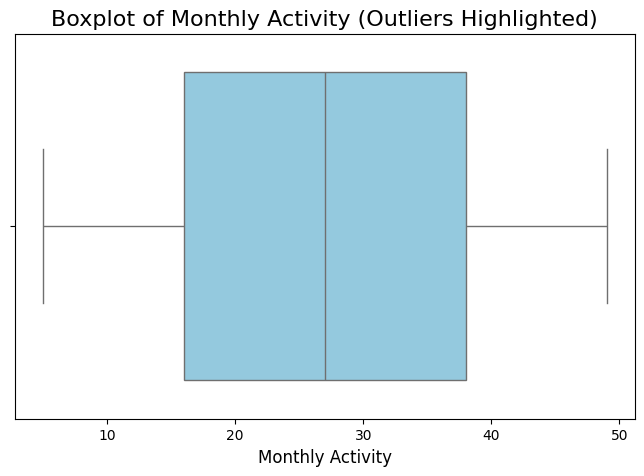

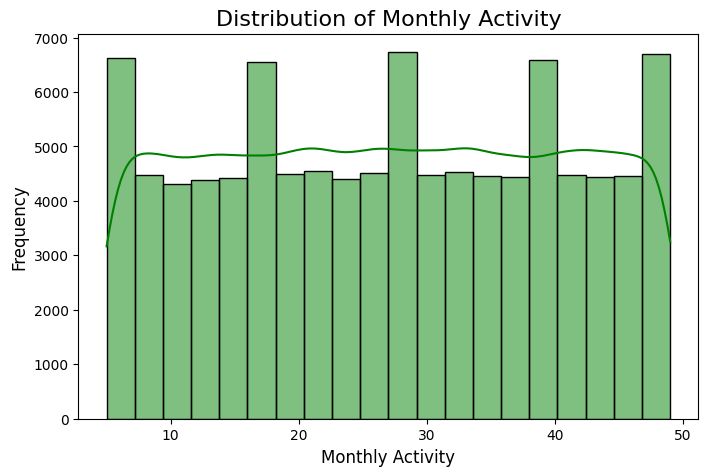


Correlation Between Age and Monthly Activity:
                      Age  Monthly_Activity
Age               1.00000          -0.00256
Monthly_Activity -0.00256           1.00000


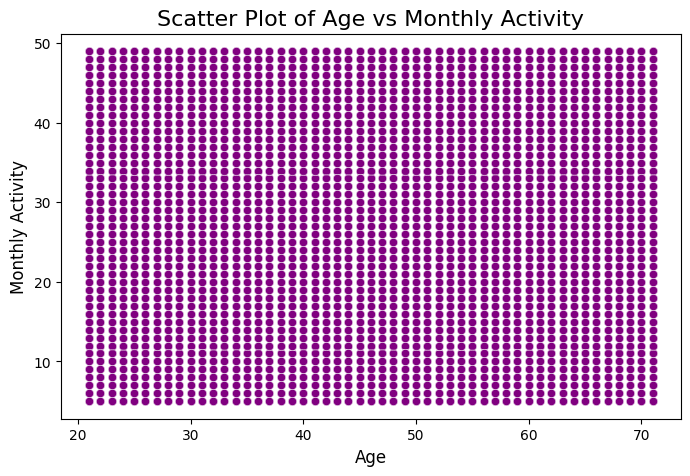

In [16]:


# Preprocessing: Add a numerical column for demonstration (e.g., 'Monthly_Activity')
np.random.seed(42)
data['Monthly_Activity'] = np.random.randint(5, 50, size=len(data))  # Simulated activity
data['DOB'] = pd.to_datetime(data['DOB'], errors='coerce')
data['Age'] = datetime.now().year - data['DOB'].dt.year

# Step 1: Summary Statistics
print("Summary Statistics:")
print(data.describe())

# Step 2: Detecting Outliers Using the IQR Method
Q1 = data['Monthly_Activity'].quantile(0.25)
Q3 = data['Monthly_Activity'].quantile(0.75)
IQR = Q3 - Q1

# Define outliers as values below Q1 - 1.5*IQR or above Q3 + 1.5*IQR
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = data[(data['Monthly_Activity'] < lower_bound) | (data['Monthly_Activity'] > upper_bound)]
print("\nOutliers Detected:")
print(outliers)

# Step 3: Visualizing Patterns and Outliers
## Boxplot to Visualize Outliers
plt.figure(figsize=(8, 5))
sns.boxplot(data=data, x='Monthly_Activity', color='skyblue')
plt.title('Boxplot of Monthly Activity (Outliers Highlighted)', fontsize=16)
plt.xlabel('Monthly Activity', fontsize=12)
plt.show()

## Distribution Plot to Observe Patterns
plt.figure(figsize=(8, 5))
sns.histplot(data['Monthly_Activity'], bins=20, kde=True, color='green')
plt.title('Distribution of Monthly Activity', fontsize=16)
plt.xlabel('Monthly Activity', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

# Step 4: Correlation Analysis
## Analyze correlation between Age and Monthly Activity
correlation = data[['Age', 'Monthly_Activity']].corr()
print("\nCorrelation Between Age and Monthly Activity:")
print(correlation)

# Visualize correlation
plt.figure(figsize=(8, 5))
sns.scatterplot(data=data, x='Age', y='Monthly_Activity', color='purple', alpha=0.6)
plt.title('Scatter Plot of Age vs Monthly Activity', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Monthly Activity', fontsize=12)
plt.show()
